## Road image file

In [14]:
import os
import cv2
import matplotlib.pyplot as plt 

In [15]:
IMAGE_FORMAT = ["jpeg", "jpg", "png"]

def list_image_files(data_dir, sub_dir):
    image_files = []
    images_dir = os.path.join(data_dir, sub_dir)
    for file_path in os.listdir(images_dir):
        if file_path.split(".")[-1] in IMAGE_FORMAT:
            image_files.append(os.path.join(sub_dir, file_path))
    return image_files

In [16]:
# Road image file path
train_data_dir = "./Covid19-dataset/train"
class_list = ["Normal", "Covid", "Viral Pneumonia"]

In [17]:
# function of set file
class Chest_dataset():
    def __init__(self, data_dir, transformer=None):
        self.data_dir = data_dir
        normal = list_image_files(data_dir, "Normal")
        covid = list_image_files(data_dir, "Covid")
        pneumonia = list_image_files(data_dir, "Viral Pneumonia")
        
        self.files_path = normal + covid + pneumonia
        self.transformer = transformer
        
    def __len__(self):
        return len(self.files_path)
    
    def __getitem__(self, index):
        image_file = os.path.join(self.data_dir, self.files_path[index])
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        class_name = self.files_path[index].split(os.sep)[0]
        class_id = class_list.index(class_name)
        
        if self.transformer:
            image = self.transformer(image)
            class_id = torch.Tensor([target]).long()
            
        return image, class_id

In [18]:
dset = Chest_dataset(data_dir=train_data_dir)

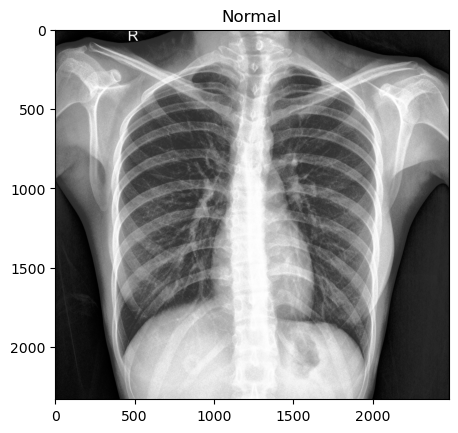

In [19]:
index = 0
image, target = dset[index]

plt.title(class_list[target])
plt.imshow(image)

In [20]:
len(dset)

251

### Convert to tensor type

In [21]:
import torch
from torchvision import transforms

In [22]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [25]:
train_dset = Chest_dataset(train_data_dir, transformer)
index = 200
image = train_dset[index][0]
target = train_dset[index][1]
print(image.shape)
print(target)

torch.Size([3, 224, 224])
tensor([0])


### Data Loader

In [26]:
from torch.utils.data import DataLoader

In [27]:
train_data_dir = "./Covid19-dataset/train/"
val_data_dir = "./Covid19-dataset/test/"

train_dset = Chest_dataset(train_data_dir, transformer)
train_dloader = DataLoader(train_dset, batch_size=4, shuffle=True, drop_last=True)
val_dset = Chest_dataset(val_data_dir, transformer)
val_dloader = DataLoader(val_dset, batch_size=1,drop_last=False)

In [28]:
# dataloader function
def build_dataloader(train_data_dir, val_data_dir):
    dataloaders = {}
    train_dset = Chest_dataset(train_data_dir, transformer)
    dataloaders["train"] = DataLoader(train_dset, batch_size=4, shuffle=True, drop_last=True)
    val_dset = Chest_dataset(val_data_dir, transformer)
    dataloaders["val"] = DataLoader(val_dset, batch_size=1,drop_last=False)
    return dataloaders

In [29]:
train_data_dir = "./Covid19-dataset/train/"
val_data_dir = "./Covid19-dataset/test/"
dataloaders = build_dataloader(train_data_dir, val_data_dir)

### Load Classification Model - VGG19

In [31]:
from torchvision import models

In [32]:
model = models.vgg19(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /Users/jin-yulim/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [38]:
from torchsummary import summary

summary(model, (3, 224, 224), batch_size=1, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 64, 224, 224]           1,792
              ReLU-2          [1, 64, 224, 224]               0
            Conv2d-3          [1, 64, 224, 224]          36,928
              ReLU-4          [1, 64, 224, 224]               0
         MaxPool2d-5          [1, 64, 112, 112]               0
            Conv2d-6         [1, 128, 112, 112]          73,856
              ReLU-7         [1, 128, 112, 112]               0
            Conv2d-8         [1, 128, 112, 112]         147,584
              ReLU-9         [1, 128, 112, 112]               0
        MaxPool2d-10           [1, 128, 56, 56]               0
           Conv2d-11           [1, 256, 56, 56]         295,168
             ReLU-12           [1, 256, 56, 56]               0
           Conv2d-13           [1, 256, 56, 56]         590,080
             ReLU-14           [1, 256,